In [16]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()

In [94]:
KEYWORDS=['Bioconda','BioLinux','GNU Guix','Homebrew','Vagrant','Docker','pip install','Advanced Package Tool','The Yellowdog Updater','The Comprehensive R Archive Network','Bioconductor','0Install'] 

In [95]:
KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
df_CODES= pd.DataFrame(KEYWORDS_CODES)
df_CODES

,mid,title,type
0,/m/013205cj,Conda,Package manager
1,/m/092kh6,BioLinux,Topic
2,/m/012smtzx,GNU Guix,System software
3,/m/0fq175b,Homebrew,Package manager
4,/m/0jwtqm2,Vagrant,Software
5,/m/0wkcjgj,Docker,Software
6,/m/0hzm844,pip,Package manager
7,/m/019n4k,APT,Software
8,/m/01qhl0,yum,Software
9,/g/120vz7f0,CRAN,Topic


In [96]:
EXACT_KEYWORDS=df_CODES['mid'].to_list()
DATE_INTERVAL='2000-01-01 2021-05-21'
COUNTRY=["US"] #Use this link for iso country code
CATEGORY=32 # Use this link to select categories --> 32 is software, 0 is all categories 
SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [97]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)

In [98]:
df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index
df_trends.columns=['date','Bioconda','BioLinux','GNU Guix','Homebrew','Vagrant','Docker','pip','apt','yum','CRAN','Bioconductor','ZeroInstall'] #change column names

In [99]:
df_trends

,date,Bioconda,BioLinux,GNU Guix,Homebrew,Vagrant,Docker,pip,apt,yum,CRAN,Bioconductor,ZeroInstall
0,2004-01-01,66,0,0,24,0,0,0,45,49,100,0,0
1,2004-02-01,0,0,0,24,0,0,31,100,9,0,0,0
2,2004-03-01,0,0,0,30,0,9,0,96,24,62,0,0
3,2004-04-01,0,0,0,23,0,0,0,73,64,0,0,0
4,2004-05-01,0,0,0,85,0,0,28,77,51,44,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2021-01-01,65,0,0,42,11,54,40,13,12,6,10,0
205,2021-02-01,32,0,0,51,10,61,42,13,18,2,3,0
206,2021-03-01,47,0,0,47,2,57,53,13,14,4,10,0
207,2021-04-01,69,0,94,34,17,56,60,13,15,10,11,0


In [119]:
df_trends["ZeroInstall"].mean()

2.1818181818181817

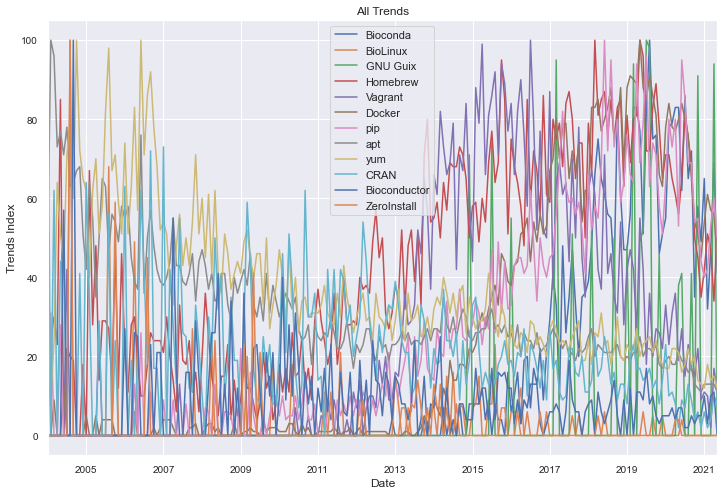

In [100]:
import seaborn as sns
sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['Bioconda','BioLinux','GNU Guix','Homebrew','Vagrant','Docker','pip','apt','yum','CRAN','Bioconductor','ZeroInstall'], kind="line", title = "All Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

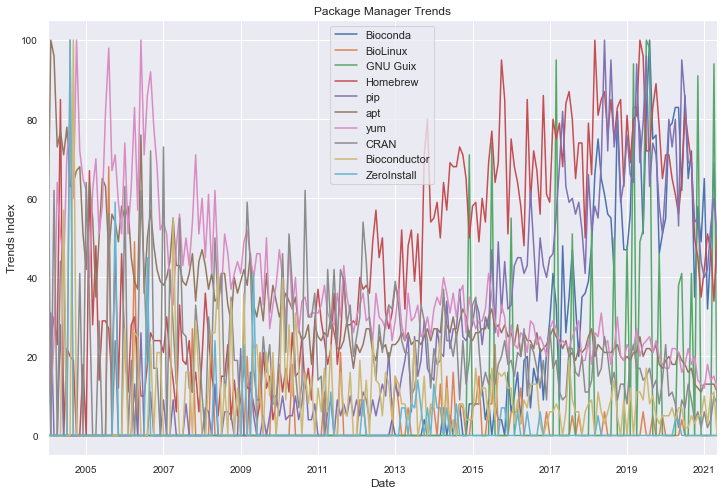

In [101]:
import seaborn as sns
sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['Bioconda','BioLinux','GNU Guix','Homebrew','pip','apt','yum','CRAN','Bioconductor','ZeroInstall'], kind="line", title = "Package Manager Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

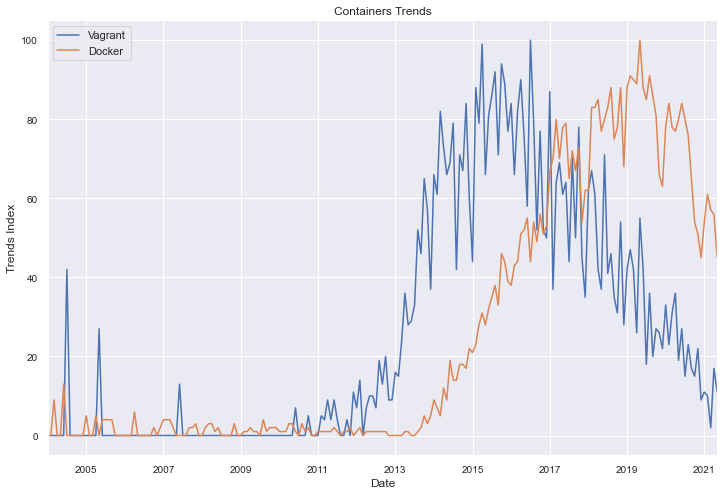

In [102]:
import seaborn as sns
sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['Vagrant','Docker'], kind="line", title = "Containers Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

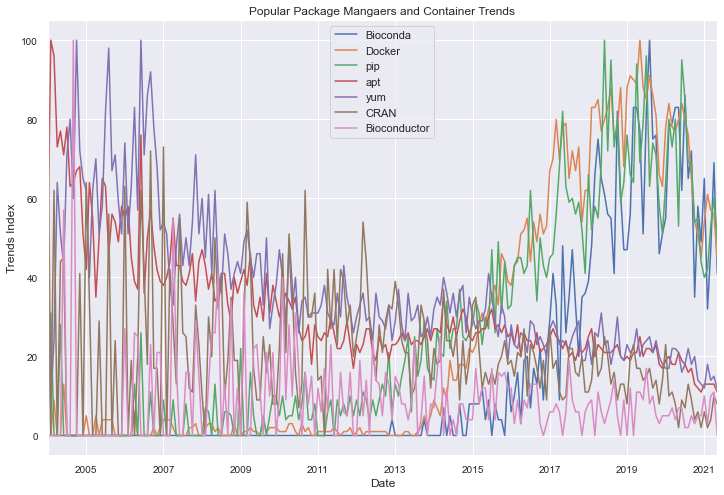

In [103]:
import seaborn as sns
sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['Bioconda','Docker','pip','apt','yum','CRAN','Bioconductor',], kind="line", title = "Popular Package Mangaers and Container Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)